In [106]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

data = pd.read_csv("./data/train.csv", encoding="UTF-8")
test = pd.read_csv("./data/test.csv",encoding="UTF-8")

In [107]:
#데이터 확인
data.head(10)

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
5,6,내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작,1
6,7,성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음,0
7,8,마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.,1
8,9,"가슴 찡했던, 오래 기억에남을 영화!!",1
9,10,결말 기분나쁘다 공포매니아에게 이따위 결말을,0


In [108]:
# 데이터 타입 확인
data.dtypes

id           int64
document    object
label        int64
dtype: object

In [109]:
# id 컬럼 제거
#data.drop(['id'],axis=1,inplace=True)

In [110]:
#데이터 차원 확인
data.shape  #데이터 길이만 확인할 경우 len(data['document'])

(5000, 3)

In [111]:
#test 데이터 타원 확인
test.shape

(5000, 2)

In [112]:
#결측치 확인
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [113]:
#test 데이터 결측치 확인
test.isnull().sum()

id          0
document    0
dtype: int64

<AxesSubplot:>

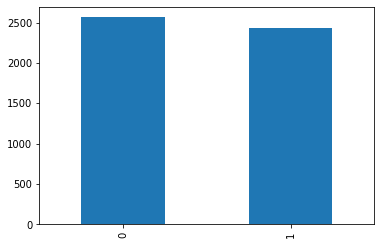

In [114]:
# label 분포 확인
data['label'].value_counts().plot(kind= "bar")

In [115]:
# label 0, 1 빈도수 체크
data.groupby('label').size().reset_index(name = 'freq')

,label,freq
0,0,2564
1,1,2436


0(부정)이 1(긍정)보다  88개가 많은 것을 알 수 있습니다.

In [157]:
#정규식 표현 함수
import re

def regular_expression(document):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣|a-z|A-Z]')
    result = hangul.sub("",document)
    return result
    

정규식을 이용해서 텍스트 내에 특수문자와 띄어쓰기를 제거 해야합니다.

In [158]:
#정규식 적용
data['document'] = data['document'].apply(regular_expression)
data

,id,document,label
0,1,영상이나음악이이쁘다해도미화시킨불륜일뿐,0
1,2,히치콕이이영화를봤다면분명박수를쳤을듯,1
2,3,괜찮은음악영화가또나왔군요따뜻한겨울이될것같아요,1
3,4,아무래도년도지난작품이라지금보기는너무유치하다,0
4,5,지금까지의영화들이그랬듯이영화역시일본에대한미화는여전하다,0
...,...,...,...
4995,4996,좋은배우들로류영화를찍은안타까운영화,0
4996,4997,진짜드럽게재미없다에드워드호퍼그림에배경빼고는볼게아닌영화,0
4997,4998,가장실망스러운영화지금까지본영화중,0
4998,4999,이런평점테러네이버에서좀막아야하는것아닌가,1


In [159]:
# test 데이터 모델 적용
test['document']=test['document'].apply(regular_expression)

In [160]:
test.head()

,id,document
0,1,시간때우기좋은영화지루함
1,2,훈훈한정이느껴지는영화가족끼리드라마보듯이보면딱
2,3,Childhoodfantasy
3,4,멋있는영화입니다잊을수없는
4,5,너무감동적이네요펑펑울었습니다


In [180]:
test.loc[2,"document"]= "어린시절환상"

In [181]:
test.head

<bound method NDFrame.head of         id                  document
0        1              시간때우기좋은영화지루함
1        2  훈훈한정이느껴지는영화가족끼리드라마보듯이보면딱
2        3                    어린시절환상
3        4             멋있는영화입니다잊을수없는
4        5           너무감동적이네요펑펑울었습니다
...    ...                       ...
4995  4996  연계도제대로안되고뭔가부족한느낌이들고찝찝한영화
4996  4997         내생에최악의영화중하나졸려서미칠뻔
4997  4998       지금까지나온드라마중최고였습니다점만점
4998  4999       영화값으로엄청난공연을보았다이게웬횡재
4999  5000          올해엔롯데자이언츠가꼭우승했으면

[5000 rows x 2 columns]>

3행의 childhoodfantasy는 정수를 부여할 때 공란으로 바뀌기 때문에 한글로 직접 입력한다.
데이터 원소가 하나이기 때문에 삭제하는 것보단 직접 변경하는게 좋은것같다.

In [120]:
# 한국어 형태소 분석하기 - 명사 단위
from konlpy.tag import Okt
from collections import Counter

In [69]:
#말뭉치 생성
corpus = " ".join(data['document'].tolist())
#corpus

In [70]:
#말뭉치 정규화 적용
regular_expression(corpus)

'영상이나음악이이쁘다해도미화시킨불륜일뿐히치콕이이영화를봤다면분명박수를쳤을듯괜찮은음악영화가또나왔군요따뜻한겨울이될것같아요아무래도20년도지난작품이라지금보기는너무유치하다지금까지의영화들이그랬듯이영화역시일본에대한미화는여전하다내인생에있어손까락에꼽히는영화원작을능가한리메이크작성룡영화중최악차라리러시아워가훨씬나음마음이성숙하고보면다르게보이는영화걸작이다가슴찡했던오래기억에남을영화결말기분나쁘다공포매니아에게이따위결말을즐겁게본성장영화화이팅긴장감도없고재미도없고주제도없다박신양때문에프로젝트는망햇어윽내사랑말이필요없다절대길게느껴지지가않는다짧았지만임팩트있었던영화문채원씨연기정말좋았습니다담담하게서술해낸기적같은스포츠사의한이변우리가사는세계도의심하리만치재미때가리없음뭔내용이아무리만화라지만거지같은지살짝지루할수있으나두배우의명연기그리고소재가참신하다왜전투씬이없어액션만화에전투씬이왜없어왜적들이다발려처절한영화슬픈영화씁쓸한영화처음부터끝까지유치하기그지없다난해한영화전쟁아이들의목소리가참거슬린다멋진상상력아름다운영화여배우소이의재발견그시대엔이영화가최고였음재미없다애들도싫어할듯initiation을한글로이니테이션이랜다개빡치게하는드라마질퍽거려너토나올지경이다카모메안경은재밌었는데이건지루하다닥터후시리즈는뭐다관심이다정말아무것도할일이없다면보세요2배속으로현실적이지도그렇다고환상적이지도않은불행한로맨틱코미디소설을모욕하는영화추상미자살씬만기억에남는다이고은잊기울컥왜영점은없지일점도아까운디좋은의도로만들었지만영화내에선그의도를느낄수없다눈물흘리면서봤습니다그리스도인들에게추천합니다역시피터잭슨완전재밌어영화평점작성하신분들왜케웃김보다가빵터졌어요재밌었어요스릴도있었구요액션신이기억에남아요욕쟁이할머니가유쾌하게그녀들과함께하며절대지지않는이야기사랑스러운인물들의희비극이엇갈리는삶정준호출연영화는두사부일체거룩한계보말고는보면욕나옴저나이에저런연기를펼칠수있다는자체가기적에가깝다그당시엔왜에로물로보였을까촌스럽고지루해여근데유동근아내가선생님팰땐웃겨음말이필요없다그냥영화를보면답이있다개노잼진심비추다이거십점준애들뭐냐아나댓글이더웃겨과정은나름볼만했다하지만결만은뻔하고식상하다재밌게잘봤어요남자너무멋져아진심한국애니의미래입니다코미디영화

In [71]:
#전체 말뭉치(corpus)에서 명사 형태소 추출
okt=Okt()
nouns = okt.nouns(regular_expression(corpus))
#nouns

In [72]:
# 단어 빈도 탐색
counter = Counter(nouns)
counter.most_common(10)


[('영화', 1094),
 ('정말', 255),
 ('진짜', 204),
 ('최고', 184),
 ('점', 166),
 ('평점', 156),
 ('연기', 139),
 ('감동', 132),
 ('보고', 120),
 ('스토리', 112)]

In [73]:
# tran, test dat set 분할
from sklearn.model_selection import train_test_split
X = data[data.columns[0:3]]


train_data, test_data = train_test_split(X,random_state=42)

In [74]:
train_data

,id,document,label
4884,4885,처음평점올리는데시간이아깝다,0
3163,3164,완전재밌던데특히심은경이랑김동욱연기잘하던데,1
490,491,난공포영화좋아하는편인데도이건진짜별로였음,0
862,863,재미도없고감동도없고무엇보다주인공자체가마음에안드네,0
1740,1741,당황스런억지설정에방황하다,0
...,...,...,...
4426,4427,아줌마쀨나는베리모어의한계,0
466,467,순수하고아름답다ost도영화에한몫하는듯,1
3092,3093,무슨생각으로이런예능을만들었는가다시는안봤으면좋겠다,0
3772,3773,왜가슴이먹먹한가요,1


In [75]:
test_data

,id,document,label
1501,1502,영화잘봤습니다보면서졸앗네요,0
2586,2587,대단했지투유초콜렛광고도한번보삼추억이새록새록,1
2653,2654,대체우리보고어쩌라는거냐좋은점수를줄수가없다,0
1055,1056,지금보기엔별거없음뻔함극적인감동도약하고,0
705,706,십광구네요정말굳입니다추천,1
...,...,...,...
4141,4142,지루하다소재는그럴듯하지만,0
3168,3169,주온보다못한영화는되지않기를,0
2478,2479,왜이렇게낮지이건무조건명작,1
4214,4215,지루하고잘뻔했다소요가자켓을얻기위해뽀뽀를하는장면은충격적이였다,0


In [76]:
#불용어 사전
#stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords = ['은','는','이','가','을','를','들','에','대','되다','같다','대','도미',
            '치콕','치다','너무','년도','이라','내','나다','에게','남',"이나",'이다','한','작',"있다","까지의",'락에꼽',
            '중','그렇다','늘다','과','그','개','로','의','로','다','랜','부터','까지',
            '그리고','엔','도','다애','션','뭐','냐',"니","또","인","손",'결말','보이다','보다','일','뿐',
            '카','모','메','화','저','유동근','아내','선생님','ㄴㅐ','두','아무','리만','랑','윽내사','박신양',
            '처럼','미리','쓰다','우디앨런','인데','쩌','너','봣습','음','성룡','다그','냥','때','것',
            '하다','장영','지','지도','수','전','이런','아','르노','형','연','기','때',"그때",'이건']

In [273]:
#토큰화
from tqdm import tqdm

X_train = []

for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [ word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)
    

100%|██████████████████████████████████████████████████████████████████████████████| 3750/3750 [00:41<00:00, 90.94it/s]


In [274]:
X_train[:5]

[['처음', '평점', '올리다', '시간', '아깝다'],
 ['완전', '재밌다', '특히', '심은경', '이랑', '김동욱', '연기', '자다'],
 ['난', '공포영화', '좋아하다', '펴다', '진짜', '별로'],
 ['재미', '없다', '감동', '없다', '무엇', '주인공', '자체', '마음', '안드', '네'],
 ['당황', '스런', '억', '설정', '방황', '하']]

In [275]:
X_test = []

for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [ word for word in tokenized_sentence if not word in stopwords]
    X_test.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████████████| 1250/1250 [00:13<00:00, 90.09it/s]


In [276]:
X_test[:5]

[['영화', '잘', '졸다'],
 ['대단하다', '투유', '초콜렛', '광고', '한번', '보삼', '추억', '새록새록'],
 ['대체', '우리', '보고', '어', '라는', '거', '좋다', '점수', '주다', '없다'],
 ['지금', '보기', '별거', '없다', '뻔하다', '극적', '감동', '도약', '하고'],
 ['십', '광구', '네', '요', '정말', '굳다', '추천']]

In [277]:
test_df=[]
for sentence in tqdm(test['document']):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [ word for word in tokenized_sentence if not word in stopwords]
    test_df.append(stopwords_removed_sentence)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:57<00:00, 87.51it/s]


In [278]:
test_df[:5]

[['시간', '때우다', '좋다', '영화', '지루함'],
 ['훈훈하다', '정이', '느껴지다', '영화', '가족', '끼리', '드라마', '딱'],
 ['어린시절', '환상'],
 ['멋있다', '영화', '잊다', '없다'],
 ['감동', '적', '이네', '요', '펑펑', '울다']]

In [279]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [280]:
# 부여된 고유 정수 확인
tokenizer.word_index

{'영화': 1,
 '없다': 2,
 '좋다': 3,
 '정말': 4,
 '재밌다': 5,
 '진짜': 6,
 '만': 7,
 '하': 8,
 '적': 9,
 '최고': 10,
 '점': 11,
 '평점': 12,
 '않다': 13,
 '아깝다': 14,
 '재미있다': 15,
 '감동': 16,
 '재미없다': 17,
 '으로': 18,
 '나오다': 19,
 '요': 20,
 '아니다': 21,
 '지루하다': 22,
 '왜': 23,
 '게': 24,
 '1': 25,
 '재미': 26,
 '에서': 27,
 '만들다': 28,
 '드라마': 29,
 '나': 30,
 '이영화': 31,
 '스토리': 32,
 '배우': 33,
 '연기': 34,
 '감독': 35,
 '시간': 36,
 '보고': 37,
 '네': 38,
 '생각': 39,
 '최악': 40,
 '그냥': 41,
 '와': 42,
 '말': 43,
 '본': 44,
 '고': 45,
 '사람': 46,
 '못': 47,
 '완전': 48,
 '이렇게': 49,
 '사랑': 50,
 '모르다': 51,
 '하고': 52,
 '주다': 53,
 '거': 54,
 '더': 55,
 '가다': 56,
 '자다': 57,
 '이야기': 58,
 '들다': 59,
 '10': 60,
 '액션': 61,
 '마지막': 62,
 '오다': 63,
 '정도': 64,
 '좀': 65,
 '알다': 66,
 '별': 67,
 '면': 68,
 '돈': 69,
 '볼': 70,
 '끝': 71,
 '안되다': 72,
 '작품': 73,
 '서': 74,
 '쓰레기': 75,
 '다시': 76,
 '남다': 77,
 '영': 78,
 '내용': 79,
 '명작': 80,
 '싶다': 81,
 '3': 82,
 '많다': 83,
 '좋아하다': 84,
 '아름답다': 85,
 '많이': 86,
 '이렇다': 87,
 '차다': 88,
 '라': 89,
 '2': 90,
 '무슨': 91,
 '가슴': 92,


정수는 전체 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에 높은 정수가 부여된 단어는 빈도수가 낮다는 것을 의미
빈도수가 낮은 단어들은 자연어 처리에서 배제 3회 미만인 단어에 대해서 얼만큼 비중을 차지하는지 확인

In [281]:

#3회 미만 빈도수 단어 체크

threshold = 0
total_cnt = len(tokenizer.word_index) #단어의 수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어의 개수
total_freq = 0 # 훈련데이터 전체 단어의 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 합

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value

print("단어 집합(Vocabluary)의 크기 : ", total_cnt)
print("등장 빈도가 %s번 이하인 단어의 수 : %s"%(threshold - 1, rare_cnt))
print("단어 집합에서 등장 빈도가 낮은 단어의 비율 : ",(rare_cnt/total_cnt)*100)
print("전체 빈도에서 등장 빈도가 낮은 단어의 등장 비율 : ", (rare_freq/total_freq)*100)


단어 집합(Vocabluary)의 크기 :  6040
등장 빈도가 1번 이하인 단어의 수 : 3530
단어 집합에서 등장 빈도가 낮은 단어의 비율 :  58.443708609271525
전체 빈도에서 등장 빈도가 낮은 단어의 등장 비율 :  13.593653727664817


단어 집합에서 등장 빈도가 낮은 단어의 비율이 71%이기 때문에
전부 삭제하게 되면 비어 있는 단어 집합이 많아져 예측 정확도가 떨어질 수 있다.
그래서 삭제하지 않고 예측을 진행

In [282]:

# 전체 단어 개수 중 빈도수가 2이하인 단어는 제거
# 0 번 패딩 토큰을 고려하여 +1
vocab_size = total_cnt - rare_cnt + 1
print("단어 집합 크기 : ", vocab_size)


단어 집합 크기 :  2511


In [283]:
#텍스트 시퀀스를 정수 시퀀스로 변환
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
test_df = tokenizer.texts_to_sequences(test_df)

In [284]:
#시퀀스로 잘 바뀌었는 지 확인
X_train[:5]

[[100, 12, 775, 36, 14],
 [48, 5, 454, 1616, 275, 34, 57],
 [125, 257, 84, 776, 6, 103],
 [26, 2, 16, 2, 411, 123, 173, 148, 38],
 [953, 1192, 378, 505, 1617, 8]]

In [285]:
X_test[:5]

[[1, 105, 574],
 [197, 1602, 162, 232, 2112],
 [467, 189, 37, 136, 212, 54, 3, 255, 53, 2],
 [131, 196, 1124, 2, 121, 16, 52],
 [1003, 1814, 38, 20, 4, 502, 192]]

In [286]:
test_df[:5]

[[36, 508, 3, 1, 281],
 [703, 2068, 309, 1, 429, 1732, 29, 336],
 [2376, 1185],
 [286, 1, 644, 2],
 [16, 9, 106, 20, 1883, 388]]

In [287]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [288]:
#빈 샘플 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence)<1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

3714
3714


리뷰 최대 길이 :  18
리뷰 평균 길이 :  6.041464728056004


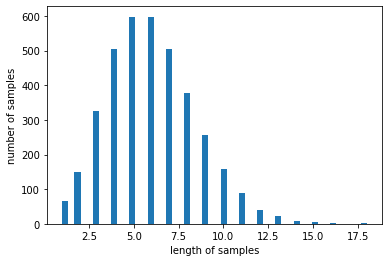

In [289]:
#패팅
import matplotlib.pyplot as plt

print('리뷰 최대 길이 : ', max(len(review) for review in X_train))
print('리뷰 평균 길이 : ', sum(map(len,X_train))/len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [290]:
def below_threshold_len(max_len, nested_list):
    count=0
    for sentence in nested_list:
        if len(sentence) <= max_len:
            count+=1
    print("전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s"%(max_len, (count/len(nested_list))*100))

In [291]:
max_len = 13
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 13 이하인 샘플의 비율 : 99.51534733441034


In [292]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
test_df = pad_sequences(test_df, maxlen=max_len)

In [293]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es,mc], batch_size=32, validation_split=0.2)

Epoch 1/15
93/93 [==============================] - ETA: 0s - loss: 0.5356 - acc: 0.737 - ETA: 0s - loss: 0.5339 - acc: 0.7378
Epoch 00001: val_acc improved from -inf to 0.81561, saving model to best_model.h5
93/93 [==============================] - 7s 34ms/step - loss: 0.5339 - acc: 0.7378 - val_loss: 0.4232 - val_acc: 0.8156
Epoch 2/15
91/93 [============================>.] - ETA: 0s - loss: 0.2850 - acc: 0.8846- ETA: 1s - loss: 0.2910 - - ETA: 0s - loss: 0.2884 - acc: - ETA: 0s - loss: 0.2824 - acc: 0.8850
Epoch 00002: val_acc improved from 0.81561 to 0.82503, saving model to best_model.h5
93/93 [==============================] - 3s 32ms/step - loss: 0.2828 - acc: 0.8842 - val_loss: 0.3803 - val_acc: 0.8250
Epoch 3/15
93/93 [==============================] - ETA: 0s - loss: 0.2074 - acc: 0.9145
Epoch 00003: val_acc did not improve from 0.82503
93/93 [==============================] - 3s 31ms/step - loss: 0.2074 - acc: 0.9145 - val_loss: 0.3729 - val_acc: 0.8223
Epoch 4/15
93/93 [===

In [294]:
loaded_model = load_model('best_model.h5')
print("X_train data 모델 정확도 : %.4f" %loaded_model.evaluate(X_test,y_test)[1])

40/40 [==============================] - 1s 8ms/step - loss: 0.5440 - acc: 0.8136
X_train data 모델 정확도 : 0.8136


In [ ]:
Epoch = 7에서 acc(정확도)가 가장 높게 나오는 것을 알 수 있다.
best_model.h5로 정확도가 가장 높은 모델을 저장

In [298]:
y_pred = model.predict(test_df)

In [299]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

y_pred의 예측값이 확률로 나오기 때문에 0.5초과는 긍정인 1, 이하는 0으로 코딩변경을 한다. 

In [300]:
submission = pd.read_csv("./data/sample_submission.csv")
submission['label'] = y_pred
submission.to_csv("./data/predict_result.csv",index=False,header=True,encoding="UTF-8")

불용어 처리를 잘해야  score를 올릴 수 있을 것 같으
또한 하이퍼 파라미터를 잘 찾는게 중요해 보인다



[참고 문헌]
https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/
https://wikidocs.net/44249